# Predicting Palmer Penguins Species
### By Lina Molla and Joycelyn Ng
Based on the well known palmer penguins data set, we wanted to create a model that most efficiently and effectively predicts the species of a penguin. In this project, we will walk you through the data cleaning, exploratory data anaylsis, feature selection, model selection, and model optimization that led us to determine the best way to predict the species of the palmer penguins.


## Data Import and Cleaning

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
penguins = pd.read_csv('palmer_penguins.csv')

In [3]:
penguins.head(20)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,NaN
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,11/15/07,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,Nest never observed with full clutch.
7,PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,11/15/07,39.2,19.6,195.0,4675.0,MALE,9.46060,-24.89958,Nest never observed with full clutch.
8,PAL0708,9,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A1,Yes,11/9/07,34.1,18.1,193.0,3475.0,NaN,NaN,NaN,No blood sample obtained.
9,PAL0708,10,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A2,Yes,11/9/07,42.0,20.2,190.0,4250.0,NaN,9.13362,-25.09368,No blood sample obtained for sexing.


In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [5]:
penguins.Sex.unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [6]:
penguins.Region.unique()

array(['Anvers'], dtype=object)

As we can see here, Anvers is the only region that all of the penguin species are in within this data set, so we will drop the Region column.

In [7]:
def clean_penguins(data_df):
    '''
    Params: 
      data_df: the data set
    Returns:
      tthe cleaned data
    '''
    df = data_df.copy()

    # shorten Species name
    df["Species"] = df["Species"].str.split().str.get(0)
    # get rid of random incorrect variable type in Sex
    df = df[df['Sex'] != '.']
    
    # drop unnecessary columns
    df = df.drop(['Sample Number', 
                  'Delta 15 N (o/oo)', 
                  'Delta 13 C (o/oo)', 
                  'Individual ID', 
                  'Comments', 
                  'Date Egg',
                  'studyName', 
                  'Stage',
                  'Clutch Completion',
                  'Region'], axis = 1)
    
    # get rid of NaN values
    df = df.dropna()

    return df

First, we did an initial clean of the data in order to remove any unnecessary columns that we will not be examining. After dropping unnecessary columns, we were able to use dropna() to get rid of any NaN values. It is important to use dropna() after we have already examined the columns, determined which ones we will not be using, and determined where the NaN values are mostly coming from. If we use dropna() first, then one of the unnecessary columns may have had a lot of NaN values and caused a large amount of the observations to be dropped when in fact they do not have NaN values for the columns we want to examine. 

We chose to drop Delta 15 N and Delta 13 C from the beginning despite the fact that they are quantitative variables. This is due to the fact that they require further understanding and analysis that we did not look into any further since there were other more beneficial quantitative variables already available to use in this data set.

In [8]:
penguins_clean = clean_penguins(penguins)
penguins_clean

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Now, the penguins data set has been cleaned to an extent to be used for splitting and exploratory data analysis (EDA).

In [9]:
penguins.shape

(344, 17)

In [10]:
penguins_clean.shape

(333, 7)

There are 7 columns and 333 rows within this dataset now that we have done the initial cleaning.

## Split into Test and Training Data

We now split the data into a train and a test set, so we can create models on the training set in order to see how closely it will resemble the "accuracy" of the test set and/or the true population. In order to do this, we held out on 20% of the data, so the test set is smaller than the training set. You want the training set to be larger to ensure a more accurate calculation of the performance of the model and then perform the test multiple times.

In [11]:
np.random.seed(1234)
train, test = train_test_split(penguins_clean, test_size = 0.2) 
# hold out 20% of the data
train.shape, test.shape

((266, 7), (67, 7))

## Exploratory Data Analysis

In this section, we performed EDA on the training set through multiple charts and graphs. In particular, we used summary tables, histograms, scatter plots, and box plots. Through looking at the different visualizations and tables, we are able to determine which three variables will be good predictors of species and will be used in our modeling.

In [12]:
train.head(20)

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
264,Gentoo,Biscoe,50.5,15.9,222.0,5550.0,MALE
138,Adelie,Dream,37.0,16.5,185.0,3400.0,FEMALE
28,Adelie,Biscoe,37.9,18.6,172.0,3150.0,FEMALE
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,FEMALE
61,Adelie,Biscoe,41.3,21.1,195.0,4400.0,MALE
29,Adelie,Biscoe,40.5,18.9,180.0,3950.0,MALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
278,Gentoo,Biscoe,43.2,14.5,208.0,4450.0,FEMALE
184,Chinstrap,Dream,42.5,16.7,187.0,3350.0,FEMALE


We decided to pick the specific qualitative variables Sex and Island and compare them against the quantitative variables Culmen Length, Culmen Depth, Flipper Length, and Body Mass within sumary tables. Using the function below, we can choose what we want to observe specifically and draw meaningful conclusions.

In [13]:
def summary_table(df, group_cols, value_cols):
    return df.groupby(group_cols)[value_cols].mean().round(2)

In [14]:
summary_table(train, ["Species", "Sex"], ["Culmen Length (mm)", 
                                          "Culmen Depth (mm)", 
                                          "Flipper Length (mm)", 
                                          "Body Mass (g)"])

Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
Species   Sex                                                                  
Adelie    FEMALE               37.06              17.69               187.80   
          MALE                 40.48              19.06               192.10   
Chinstrap FEMALE               46.70              17.58               191.54   
          MALE                 51.33              19.24               200.11   
Gentoo    FEMALE               45.66              14.26               212.98   
          MALE                 49.73              15.76               221.86   

                  Body Mass (g)  
Species   Sex                    
Adelie    FEMALE        3388.89  
          MALE          4028.02  
Chinstrap FEMALE        3501.92  
          MALE          3965.18  
Gentoo    FEMALE        4697.45  
          MALE          5492.65

In [15]:
summary_table(train, ["Species", "Island"], ["Culmen Length (mm)", 
                                             "Culmen Depth (mm)", 
                                             "Flipper Length (mm)", 
                                             "Body Mass (g)"])

Culmen Length (mm)  Culmen Depth (mm)  \
Species   Island                                             
Adelie    Biscoe                  38.97              18.39   
          Dream                   38.60              18.26   
          Torgersen               38.97              18.58   
Chinstrap Dream                   49.10              18.44   
Gentoo    Biscoe                  47.74              15.03   

                     Flipper Length (mm)  Body Mass (g)  
Species   Island                                         
Adelie    Biscoe                  188.40        3703.57  
          Dream                   189.88        3682.14  
          Torgersen               191.83        3781.43  
Chinstrap Dream                   195.98        3742.13  
Gentoo    Biscoe                  217.51        5103.00

These tables show the corelation between different qualitative and quantitative features of each of the different species. The two summary tables show that Island is a better qualitative predictor because it narrows down which Species the penguin could be. Whereas with Sex, there are both sexes for each species. As we can see, Adelie is on all three islands where as Chinstrap is only on Dream and Gentoo is only on Biscoe. 

Flipper Length seems to vary based on species. The length is the highest for Gentoo and the lowest for Adelie, and Chinstrap finds itself somewhere in the middle. Thus, it is a good quantitative predictor variable for species. This is the same for Culmen Length except Chinstrap has the highest length for this variable.

Using the function below, we can create histograms to compare each of the quantitative variables and see how they differ between each of the species. We can input the quantitative variable we want to observe and plot it accordingly.

In [16]:
def plot_hist(df, colname, alpha):
    ax.hist(df[colname], alpha = alpha, label = df["Species"])
    ax.set(xlabel = colname, ylabel = "Density")
    ax.legend()

Now we will implement the function with different variables we want to examine about the penguins.

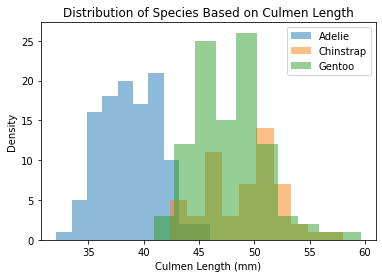

In [17]:
fig,ax = plt.subplots(1)
fig = train.groupby("Species").apply(plot_hist, "Culmen Length (mm)", 0.5)
ax.set(title = "Distribution of Species Based on Culmen Length");

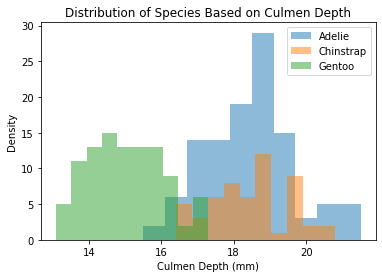

In [18]:
fig, ax = plt.subplots(1)
train.groupby("Species").apply(plot_hist, 'Culmen Depth (mm)', 0.5)
ax.set(title = "Distribution of Species Based on Culmen Depth");

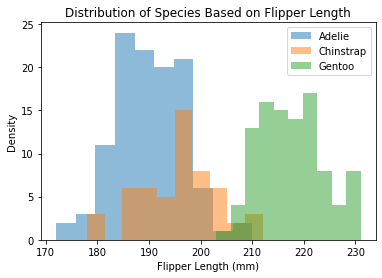

In [19]:
fig, ax = plt.subplots(1)
train.groupby("Species").apply(plot_hist, 'Flipper Length (mm)', 0.5)
ax.set(title = "Distribution of Species Based on Flipper Length");

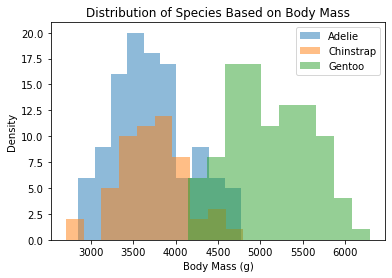

In [20]:
fig, ax = plt.subplots(1)
train.groupby("Species").apply(plot_hist, 'Body Mass (g)', 0.5)
ax.set(title = "Distribution of Species Based on Body Mass");

This function is very clean and easy to use, but it plotted the graphs each separately. In order to better compare the different variables, we will look at them side by side and see what we can decipher from the graphs.

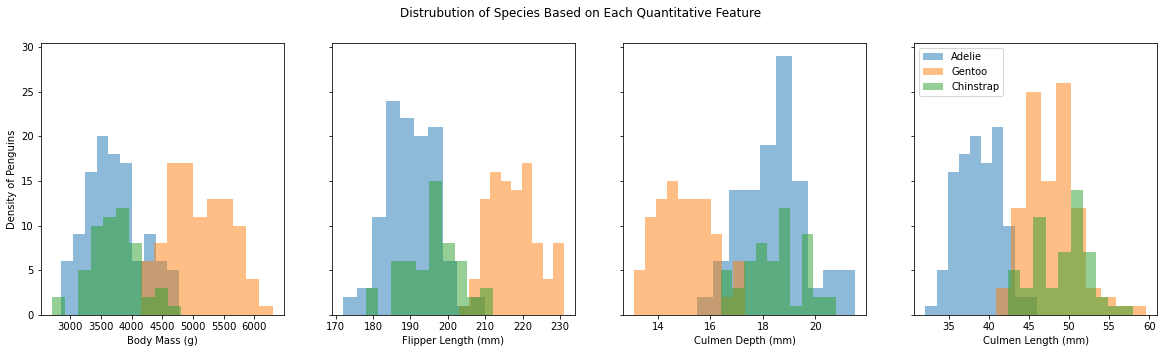

In [21]:
fig, ax = plt.subplots(1, 4, figsize = (20, 5), sharey = True)
featureList = ["Body Mass (g)", "Flipper Length (mm)",
               "Culmen Depth (mm)", "Culmen Length (mm)"]

ax[0].set(ylabel = "Density of Penguins")

for i in range (0,len(featureList)):
    for j in train["Species"].unique():
        df = train[train["Species"] == j]
        ax[i].set(xlabel = featureList[i])
        ax[i].hist(df[featureList[i]], label = j, alpha = 0.5)

plt.legend()
fig.suptitle("Distrubution of Species Based on Each Quantitative Feature");

There seem to be more Adelie and Gentoo penguins that Chinstrap penguins. We will examine each histogram starting with the first plot which is the plot farthest to the left.

**(1)** This histogram shows that there is the largest difference of Body Mass with Gentoo penguins compared to that of Adelie or Chinstrap penguins. Adelie and Chinstrap do not differ in terms of Body Mass by as much.

**(2)** There is a larger spread of the penguins when looking at Flipper Length with Adelie having the shortest flippers, Gentoo having the longest, and Chinstrap being somewhere in the middle at least to some extent. With this in mind, Flipper Length is more telling since the penguins differ a bit more in terms of what their range of Flipper Length is based on the species, so this is a good quantitative variable to look at.

**(3)** When it comes to Culmen Depth, Adelie and Chinstrap have larger Culmen Depths whereas Gentoo has lower Culmen Depths on average. Having larger depths, Culmen and Adelie do differ in sizes a bit just as Flipper Length does, so it could potentially be a telling variable. We will determine this later on as we examine the variables even further.

**(4)** As we see here, Adelie have lower Culmen Lengths compared to Chinstrap and Gentoo. Both Chinstrap and Gentoo have longer Culmen Lengths, but their lengths seem to range form around the same sizes which is not as telling when it comes to predicting the species of the penguin.

Next, we will examine scatter plots of the data set based on the qualitative features Sex and Island. We will determine if there is any interesting information regarding the Sex or Island of the penguin that can be used to predict the species.

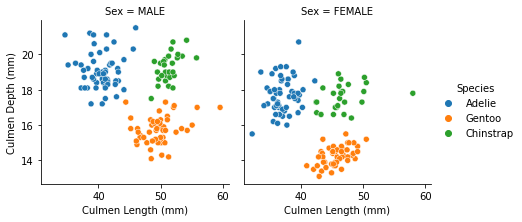

In [22]:
fgrid = sns.relplot(x = "Culmen Length (mm)", 
                    y = "Culmen Depth (mm)", 
                    hue = "Species",
                    col = "Sex",
                    height = 3,
                    aspect = 1, 
                    data = train)

These scatter plots show the difference between the Culmen Length and the Culmen Depth based on Sex. As we can see, the correlation between the two quantitative variables does not seem to be very strong with Males or Females. We can definitely see clusters that can be made out between the different species, but in separating the plots by Sex, Sex is not that informative. The plots of those of Males vs those of Females seem to be about the same, failing to relay any importance when it comes to the Sex of the penguins in regards to Culmen Length and Culmen Depth. We will explore Island next to see if it is more informative than Sex seemed to be in these plots.

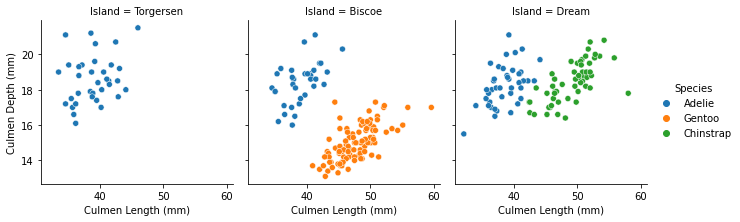

In [23]:
fgrid = sns.relplot(x = "Culmen Length (mm)", 
                    y = "Culmen Depth (mm)", 
                    hue = "Species",
                    col = "Island",
                    height = 3,
                    aspect = 1, 
                    data = train)

The qualitative feature Island is much more telling. With these scatter plots, it is clear that only the Adelie species is on Torgersen, only the Gentoo and Adelie species are on Biscoe, and on Dream, only the Chinstrap and Adelie species are present. Not only this, it is clear that if we examine the individual islands which already narrows the species down even further, then the Culmen Length does differ quite a bit depending on the species which makes it even easier to decipher which species the penguin is.

Therefore, the qualitative variable of Island is a great predictor to look at, and Culmen Length is also informative as to which species the penguin could be.

Next, we used boxplots to examine the different quantitative variables based on the Island of the penguin.

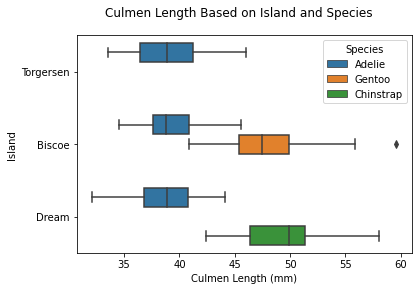

In [24]:
fgrid = sns.boxplot(x = "Culmen Length (mm)", 
                    y = "Island",
                    hue = "Species",
                    data = train)
plt.suptitle("Culmen Length Based on Island and Species");

As shown above in the box plot, this yields the same result as the scatter plot based on the variable Island. This further confirms that we should use the qualititive variable Island as our qualitative variable because it clearly narrows down the species, and when looking at Culmen Length again, it is confirmed that Culmen Length on each Island differs based on the species. Thus, it will be useful to use Island and Culmen Length because when we examine the different Islands, we narrow down the species to either Adelie if the Island is Torgersen, Adelie or Gentoo if on Biscoe, and Adelie or Chinstrap if on Dream. Then, by comparing the Culmen Length of the species Gentoo and Chinstrap, we are able to potentially determine our target species. However in order to better analyze this, we need another quantitative variable.

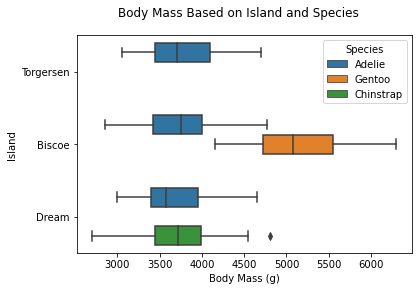

In [25]:
fgrid = sns.boxplot(x = "Body Mass (g)", 
                    y = "Island",
                    hue = "Species",
                    data = train)
plt.suptitle("Body Mass Based on Island and Species");

In this box plot, there is a big diference between Gentoo and the other two species, so we could use it as our second quantiative variable, but we will examine another quantitative variable to see if it yields better results. In this plot, we see that Dream and Adelie are the closest in terms of Body Mass whereas the Body Mass of Gentoo is significantly higher. If we used this variable, it may be harder to determine the species between Adelie and Chinstrap because their range of Body Mass is very similar.

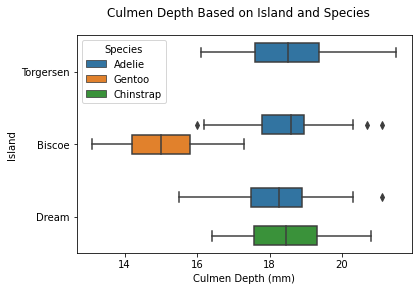

In [26]:
fgrid = sns.boxplot(x = "Culmen Depth (mm)", 
                    y = "Island",
                    hue = "Species",
                    data = train)
plt.suptitle("Culmen Depth Based on Island and Species");

Just as with Body Mass, the Culmen Depth of the Chinstrap species most closely resembles the Adelie species. Gentoo is farther to the left in this boxplot because it has a lower Culmen Depth so this is another potential variable that we can use to determine the Gentoo species, but let's explore even further.

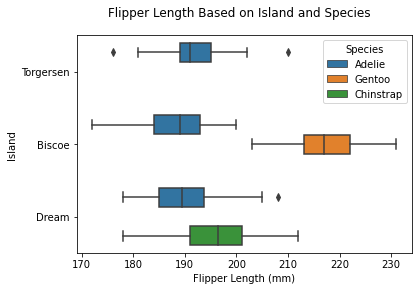

In [27]:
fgrid = sns.boxplot(x = "Flipper Length (mm)", 
                    y = "Island",
                    hue = "Species",
                    data = train)
plt.suptitle("Flipper Length Based on Island and Species");

In this boxplot, we see that there is a large distincftion between Gentoo and the other two species once again. However the key difference with Flipper Length from the other variables (besides Culmen Length) is that there is a slightly larger distinction between Adelie and Chinstrap compared to the other quantitative variables where we observed that these two species moreso overlapped in size of the quantitative variables. 

This is why we will choose Flipper Length as a good predictor variable because it does show more differentiation between the species in their lengths than the other variables. We will move on to further examine Culmen Length, Flipper Length, and Island. If you would like to see the boxplots once again, we used a for loop to plot each of them one after another one more time, so we can examine them together and see how each quantitative variable differs.

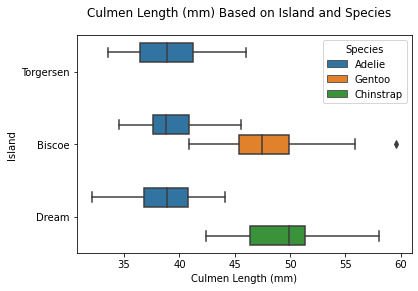

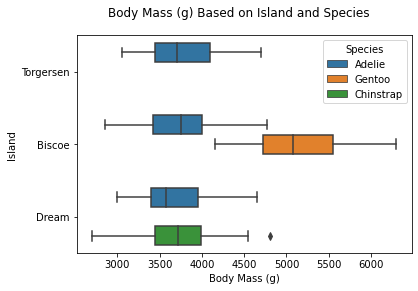

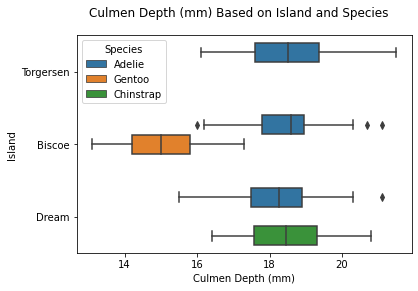

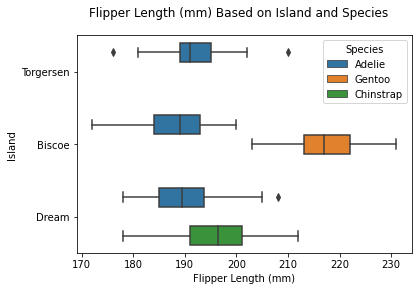

In [28]:
quantitative_var = ['Culmen Length (mm)', 
                    'Body Mass (g)', 
                    'Culmen Depth (mm)', 
                    'Flipper Length (mm)']
for var in quantitative_var:
    fgrid = sns.boxplot(x = var, 
                    y = "Island",
                    hue = "Species",
                    data = train)
    plt.suptitle(str(var) + " Based on Island and Species")
    plt.show()

# Feature Selection
Based on the EDA, we decided to select the predictor variables **Island**, **Culmen Length**, and **Flipper Length**. We have chosen these variables to predict the target variable Species because we want to examine the variables that are the most differentiable between the species for our predictions. Island was very telling in the way that only certain species existed on each unique Island. This will lead us to more easily narrow down the species just off of what Island the species belongs to. Culmen Length differed a lot based on the species, so it is a great variable to look at in order to predict species. The second most telling quantitative variable was in fact Flipper Length which we decided on after finally examining the boxplots.

## Data Cleaning, Split into X (predictor data -> Island, Culmen Length, Flipper Length) and y (target data -> Species)
We dropped all of the columns except for the 3 chosen predictor variables and the 1 target variable, species. We then split the data, so the target variable is separated from the predictor variables. We also did some additional cleaning to make the data modeling easier. The X variable holds the predictive variables (Culmen Length, Flipper Length, and Island) and the Y variable holds the target variable we want to predict: Species.

In [29]:
def prep_penguins(data_df):
    '''
    Params: 
      data_df: the data set penguins
    Returns:
      X: Island, Culmen Length (mm), Flipper Length (mm)
      y: Species (as 0, 1, or 2)
    '''
    df = data_df.copy()
    
    le = preprocessing.LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    df['Island'] = le.fit_transform(df['Island'])
    df['Species'] = le.fit_transform(df['Species'])

    # drop unnecessary columns
    # only keep 1 qualitative and 2 quantitative variables
    df = df.drop(['Culmen Depth (mm)', 
                  'Body Mass (g)',
                  'Sex'], axis = 1)

    # split into X and y
    X = df.drop(['Species'], axis = 1)
    y = df['Species']


    return(X, y)

During the data prep, we needed to transform the qualitative variables into quantitative variables. This is why we turned the Sex, Island, and Species into 0s, 1s, and 2s so we can work with them. This is necessary because we found that our models did not work if we kept them as qualitative variables because these models cannot work with the qualitative category names, so we replaced the names with number representations.

During this section in order to further clean we also dropped the columns Sex, Body Mass, and Culmen Depth because they are irrelevant to our model. We also dropped species from our X because we want the X to just be the predictor variables. We made our y the species, target variable.

In [30]:
X_train, y_train = prep_penguins(train)
X_test, y_test = prep_penguins(test)

Now we have separate training and test sets split between the predictor variables and the target variable.

In [31]:
X_train

,Island,Culmen Length (mm),Flipper Length (mm)
7,2,39.2,195.0
264,0,50.5,222.0
138,1,37.0,185.0
28,0,37.9,172.0
152,1,46.5,192.0
...,...,...,...
210,1,50.2,202.0
59,0,37.6,194.0
302,0,47.4,212.0
217,1,49.6,193.0


As you can see above X_train only contains the predictor variables. Island 0 is Biscoe, 1 is Dream, and 2 is Torgersen.

In [32]:
y_train

7      0
264    2
138    0
28     0
152    1
      ..
210    1
59     0
302    2
217    1
311    2
Name: Species, Length: 266, dtype: int64

And here you can see y_train only contains the Species represented by numbers. 0 represents Adelie, 1 represents Chinstrap, and 2 represents Gentoo.

## Modeling

## Decision Region Plot

In [33]:
# These are data used to plot dicision regions on different islands
dream_penguins = test.loc[test["Island"] == "Dream"]
dream_X, dream_y = prep_penguins(dream_penguins)

biscoe_penguins = test.loc[test["Island"] == "Biscoe"]
biscoe_X, biscoe_y = prep_penguins(biscoe_penguins)

torgersen_penguins = test.loc[test["Island"] == "Torgersen"]
torgersen_penguins.reset_index(drop = True, inplace = True)
torgersen_penguins.loc[len(torgersen_penguins.index)] = ['NULL', 
                                                         'Torgersen', 
                                                         39, 0, 191, 0, 
                                                         'FEMALE'] 
torgersen_X, torgersen_y = prep_penguins(torgersen_penguins)

/Users/linamolla/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


We did this to split up the plotting regions into three different islands. We split into the island Torgersen as well just as a formality but because Torgesen only had the Adelie Species in it we ran into a problem. The model did not like that there was only one unique class label for the y set which caused it not to execute. Thus, you will see one Decision Region Plot for each model with three species in it while the other two Islands had two species on the island, so the models were able to create the plots.

In order to plot Torgersen, I added a NULL random data point to the torgersen_penguins data set that had only penguins on Torgersen on it. This data point is just like all of the other data points on Torgersen, meaning I made it randomly with similar values to those of the other penguins on Torgersen, but I gave it the species name NULL, so the plot would think there are two different species that it is classifying the points under and will create the decision regions accordingly.

We split the data up by Island and then used the same prep cleaning function on the 3 splits of the data corresponding to island. 

In [34]:
def plot_decision_function(model, df, X, y):
    '''
    Params: 
      model: the model we are using
      df: the data
      X: the quantitative variables for the data
      y: species
    Returns:
      decision regions plot
    '''

    quant = ['Culmen Length (mm)', 'Flipper Length (mm)']
    # color = {'Adelie' : 'blue', 'Chinstrap' : 'green', 'Gentoo' : 'pink'}
    model.fit(X[quant], y)
    
    range_items = {
    feature_name: (X[feature_name].min() - 1, X[feature_name].max() + 1)
    for feature_name in quant
    }
    feature_names = list(range_items.keys())

    xx, yy = np.meshgrid(
        np.arange(range_items[feature_names[0]][0], 
                  range_items[feature_names[0]][1], 0.02),
        np.arange(range_items[feature_names[1]][0], 
                  range_items[feature_names[1]][1], 0.02)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax = sns.scatterplot(data=df, 
                         x="Culmen Length (mm)", 
                         y= "Flipper Length (mm)", hue="Species", )
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="YlGnBu")

    return ax

In this function we first had to fit the model based on the quantitative and the qualititave data. We combined both of the quantitative data from the variables into the variable quant, so it is easier to work with. After that we created a dictionary that contains the column names along with the miniumum and maximum values. Then we created the mesh grid and then computed the predictions. Afterwards, we plotted the data.

## Model 1: Support Vector Machine

We want to minimize overfitting which is why we want to determine the optimal complexity for the model. We wanted to find the best parameter for the C value which determines the margin of the hyperplane.

In [35]:
def best_Cparam(X, y):
    '''
    Params: 
      X: Island, Culmen Length (mm), Flipper Length (mm)
      y: Species
    Returns:
      best_C: The best index of the best cross validation score
      best_score: the best Cross Validation score
    '''
    fig, ax = plt.subplots(1)
    best_score = 0

    for d in range(1,15):
        model = SVC(kernel = "poly", C = d)
        cv_score = cross_val_score(model, X, y, cv=10).mean()
        ax.scatter(d, cv_score, color = "black")
        
        if cv_score > best_score:
            best_C = d
            best_score = cv_score

    ax.set(title = "Best C : " + str(best_C), 
           xlabel = "C", ylabel = "CV Score")
    return best_C, best_score

This function attempts to find the best C parameter. It initializes the best score to 0. After that it loops through 14 times the cross validation score and then finds the mean and then plots it. In order to find the best CV score each time that we go through the loop we compare it to the current based CV score to determine which one is higher. In the end it returns the best C index and also the score associated with it. 

0.9472934472934472

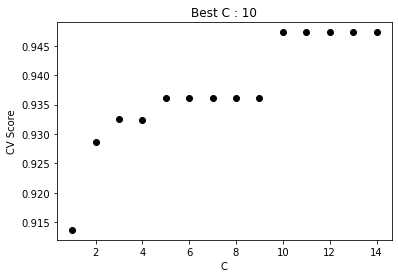

In [36]:
best_C, best_score = best_Cparam(X_train, y_train)
best_score

The best C value was determined to be 10, which is slightly large in terms of C values. This is somewhat surprising, but this is why we conducted cross validation to test a bunch of different values to determine which would be the most accurate, so this should not be a major worry for our model. Now that we have found the best C value, we will then train a model with this C value and then try to calculate the difference in scores between the training and the test data sets.

In [37]:
SVM = SVC(kernel='poly', C=best_C)
SVM.fit(X_train, y_train)
SVM.score(X_train, y_train), SVM.score(X_test, y_test)

(0.9511278195488722, 0.9552238805970149)

As we can see there is a very small difference in score between the Test and the Training set. This means that there is liekly very little over or underfitting as observed. However, we also want to look at the unseen data with a confusion matrix. 

In [38]:
y_test_pred = SVM.predict(X_test)
c = confusion_matrix(y_test, y_test_pred)
c

array([[33,  1,  0],
       [ 1, 12,  1],
       [ 0,  0, 19]])

/Users/linamolla/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


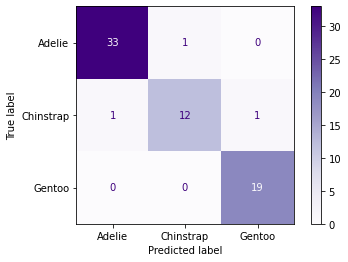

In [39]:
plot_confusion_matrix(SVM, X_test, y_test, 
                      display_labels= ['Adelie','Chinstrap','Gentoo'], 
                      cmap = plt.cm.Purples);

The two matrices plotted here are the same, just using different methods. Examining either one, the matrix furthers what we saw in the model. Our model is fairly accurate with only 1 of each species being displaced. By using this to validate the performance of the model, we see that it performed very well.

The visualization shows how accurate the model was, showing how often our predicted label matched the true label for the penguin species. For the Gentoo 19 of the 19 were corretly labeled by the model. For the Chinstrap 12 of the 14 labeled were correctly labeled and 33 of 34 of the Adelie species were labeled correctly. This means that of the 67 possible, 64 were labeled their true species. The model was a little over 95% accurate in predicting the species of penguin.

/Users/linamolla/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/linamolla/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/linamolla/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/linamolla/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Flipper Length (mm)'>

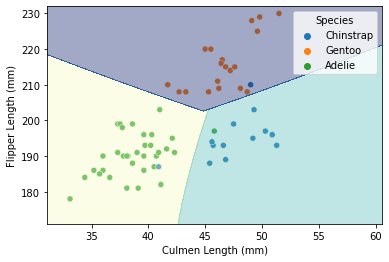

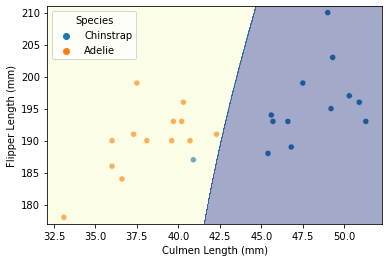

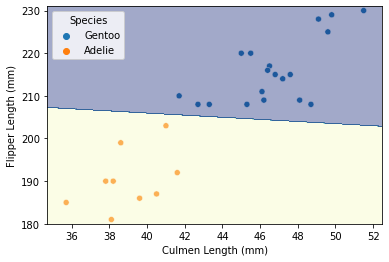

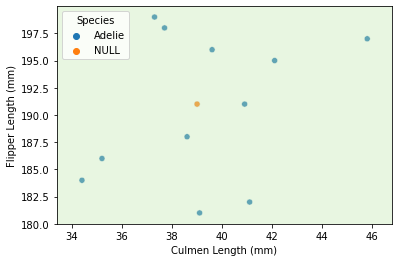

In [40]:
plot_decision_function(SVM, test, X_train, y_train)
plot_decision_function(SVM, dream_penguins, dream_X, dream_y)
plot_decision_function(SVM, biscoe_penguins, biscoe_X, biscoe_y)
plot_decision_function(SVM, torgersen_penguins, torgersen_X, torgersen_y)

Through these decision region graphs we can clearly see that only certain species are on certain islands. For example, Adelie and Chinstrap are the only two species in Dream. Gentoo and Adelie are the only two species on Biscoe. That being said, the species seem to have fallen in the correct regions with only one visible wrong classification in the Second plot further proving the accuracy of our model. We also decided to plot the the whole test set because there was an error with the fact that we did not have mutliple unique species when looking at the Torgesen island because only Adelie is on Torgeson which is why we tried to show the split based off of the test set instead for our third plot. There was no decision to be made when we are running our model on a subset of the data set where only one species is possible, so our DRP function did not want to plot it.

Looking at the island Torgersen, knowing there were only Adelie penguins, the model was able to predict the species correctly for all penguins on that island which is why we chose the predictive variable Island in the first place. It truly narrows down the species right away based on this data set.

If our results on the training and test sets had not both been as substantially accurate as they were, then we might have wanted to worry about potentially underfitting a little more. The lines are somewhat straight and not super curvy at all for the decision region borders. This is probably because of the specific test set we are working on which allowed these straighter lines to still be better border line quantitative value predictors of species despite not being as smooth and potentially curvy. So, the model may not be underfitting that much, but the lines are somewhat straight, so there is potential that our model is underfitting. Once again, this would only be more of an issue if our test and training sets hadn't both gotten good accuracy scores. 

## Model 2: Logistic Regression

In order to avoid overfitting and to create the best model, we will use cross validation to determine the value of C for our Logistic Regression Model.

In [41]:
def best_LRCparam(X, y):
    '''
    Params: 
      X: Island, Culmen Length (mm), Flipper Length (mm)
      y: Species
    Returns:
      best_C: The best index of the best cross validation score
      best_score: the best Cross Validation score
    '''
    fig, ax = plt.subplots(1)
    best_score = 0

    for d in range(1, 15):
        model = LogisticRegression(max_iter = 40000, C = d)
        cv_score = cross_val_score(model, X, y, cv=10).mean()
        ax.scatter(d, cv_score, color = "black")
        
        if cv_score > best_score:
            best_C = d
            best_score = cv_score

    ax.set(title = "Best C: " + str(best_C), xlabel = "C", ylabel = "CV Score")
    return best_C, best_score

0.9663817663817664

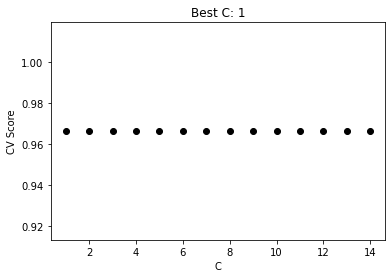

In [42]:
best_C, best_score = best_LRCparam(X_train, y_train)
best_score

In orer to not receive errors, we had to increase iterations to 40000 to find the best cross validation score in determining the C hyperparameter for the model. After using cross validation, we found that the best value for C is 1 with a score of 96.6%. This means our model generalizes to the whole of the data set fairly well with good accuracy. 

In [43]:
LR = LogisticRegression(C = best_C, max_iter = 40000)
LR.fit(X_train, y_train)
LR.score(X_train, y_train), LR.score(X_test, y_test)

(0.9661654135338346, 0.9701492537313433)

Comparing the train and test scores side by side, we see that there is a very small difference between the scores which is essential to not over or underfit the data. Our model is doing well with him scores of around 97% on the test and training sets.

In [44]:
y_test_pred = LR.predict(X_test)
c = confusion_matrix(y_test, y_test_pred)
c

array([[33,  1,  0],
       [ 1, 13,  0],
       [ 0,  0, 19]])

Again, we plotted the confusion matrix in order to observe data that is hidden. Here we see that only 1 or less of each species was misplaced meaning our model predicted the test set very accurately.

/Users/linamolla/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


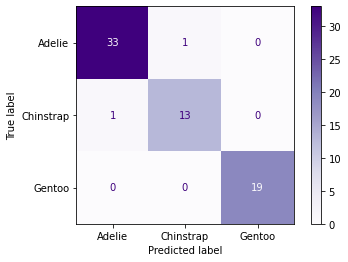

In [45]:
plot_confusion_matrix(LR, X_test, y_test, 
                      display_labels= ['Adelie','Chinstrap','Gentoo'], 
                      cmap = plt.cm.Purples)

The matrix displays how well the model predicted penguin species compared to the true species label. For the Gentoo, 19 of the 19 were labeled correctly with no errors. For the Chinstrap, 13 of the 14 were labeled accurately with one being labeled incorrectly. As for the Adelie, 33 of the 34 were correctly labeled and one was mislabeled. Overall 65 of the 67 predictions were correct, an accuracy of about 97% indicating that this model was fairly accurate. Compared to the SVM model, it is a slight bit more accurate in predicting the species, but both models both did very well. 

/Users/linamolla/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/linamolla/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/linamolla/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/linamolla/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Flipper Length (mm)'>

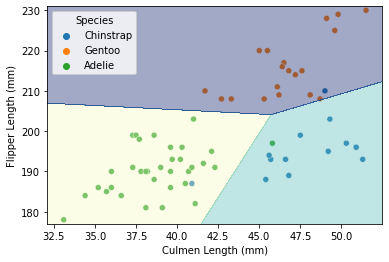

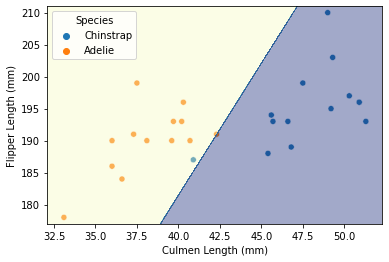

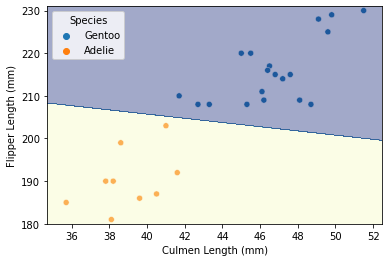

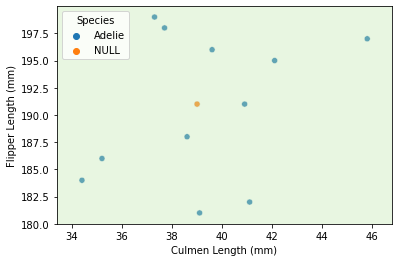

In [46]:
plot_decision_function(LR, test, X_test, y_test)
plot_decision_function(LR, dream_penguins, dream_X, dream_y)
plot_decision_function(LR, biscoe_penguins, biscoe_X, biscoe_y)
plot_decision_function(LR, torgersen_penguins, torgersen_X, torgersen_y)

These decision regions closely model the same as the decision regions for the SVM model with those misclassified being just on the decision region border lines of the plots for this Logistic Regression model. So far, both models are good for predicting the target variable species. 

Just as described in about the Decision Region Plots of the SVM model, the lines do appear to be quite straight and less curvy or precise to some extent. We will not worry about this too much since it is such a small data set, but in some cases, these straight lines may mean the model is not as representative and did not account for much variance, so that would mean the model shows some signs of underfitting.

## Model 3: Near Neighbor Classifers

In [47]:
def best_Depthparam(X, y):
    '''
    Params: 
      X: Island, Culmen Length (mm), Flipper Length (mm)
      y: Species
    Returns:
      best_depth: The best index of the best depth score
      best_score: the best Cross Validation score
    '''
    fig, ax = plt.subplots(1)
    best_score = 0

    for d in range(1,30):
        model = KNeighborsClassifier(n_neighbors = d)
        cv_score = cross_val_score(model, X, y, cv=10).mean()
        ax.scatter(d, cv_score, color = "black")
        
        if cv_score > best_score:
            best_depth = d
            best_score = cv_score

    ax.set(title = "Best Depth : " + str(best_depth), 
           xlabel = "Depth", ylabel = "CV Score")
    return best_depth, best_score

For the Near Neighbors Classifer, we used cross validation to determine the best depth hyperparameter to use for our model. We used a cross validation value of 10, determined the mean score of each test, and then plotted and compared the different depth values to determine the best value for our model.

0.9621082621082622

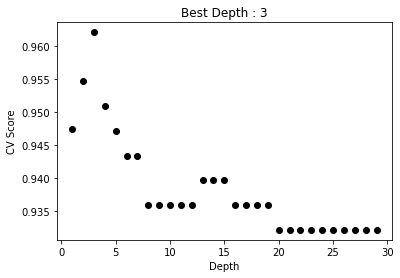

In [48]:
best_depth, best_score = best_Depthparam(X_train, y_train)
best_score

As we can see in this plot, the best Depth is 3. However, in this plot the CV scores seem to vary more. Let's look at the test and the training set to see how this chosen best depth executed.

In [49]:
KNC = KNeighborsClassifier(n_neighbors = best_depth)
KNC.fit(X_train, y_train)
KNC.score(X_train, y_train), KNC.score(X_test, y_test)

(0.9699248120300752, 0.9552238805970149)

The train and test scores are fairly close to one another once again but not as close as the two previous models. The two previous models had scores within one percent of one another, even lower than that. While this model has scores that are still extremely close, they are slightly less close than the other models with the train score being almost 97% and the test score being about 95.5%. The numbers are still close to one another so we do not believe overfitting is an issue.

In [50]:
y_test_pred = KNC.predict(X_test)
c = confusion_matrix(y_test, y_test_pred)
c

array([[33,  1,  0],
       [ 1, 12,  1],
       [ 0,  0, 19]])

/Users/linamolla/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


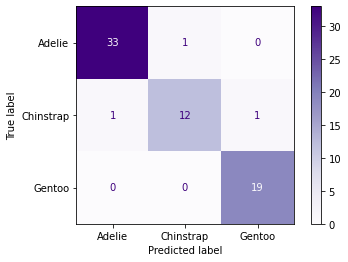

In [51]:
plot_confusion_matrix(KNC, X_test, y_test, 
                      display_labels= ['Adelie','Chinstrap','Gentoo'], 
                      cmap = plt.cm.Purples);

Examining the confusion matrix, this model, like the other two, correctly predicted all 19 species of Gentoo with no mistakes. For Chinstrap it correctly labeled 12 of the 14, and for Adelie it correctly labeled 33 of the 34. This is nearly identical to the SVM model which had the same level of accuracy, predicting 64 of the 67 true labels correctly and missing on 3 of them. Overall the model is pretty accurate, but the logistic regression model was slightly more accurate than both the other two models. 

/Users/linamolla/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/linamolla/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/linamolla/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/linamolla/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Flipper Length (mm)'>

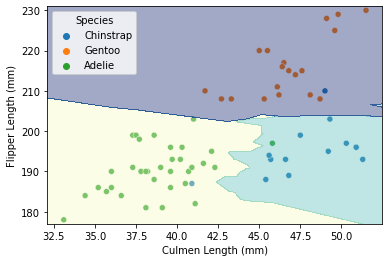

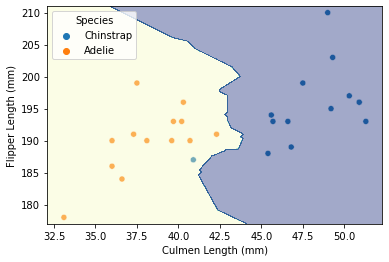

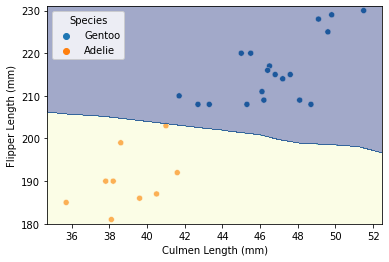

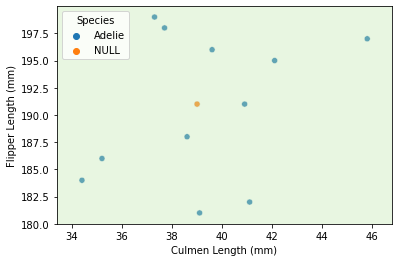

In [52]:
plot_decision_function(KNC, test, X_test, y_test)
plot_decision_function(KNC, dream_penguins, dream_X, dream_y)
plot_decision_function(KNC, biscoe_penguins, biscoe_X, biscoe_y)
plot_decision_function(KNC, torgersen_penguins, torgersen_X, torgersen_y)

As we can see in these decision region plots, it is a lot more jagged than the last two models. However, very few were misplaced once again, so we believe that after these three models, the variables that we chose were indeed great predictors of species. Because the lines are so jagged and specific, this may be a sign of overfitting, so we should be careful when examining this model. We could test it on more unseen data in order to get a better idea of it's accuracy. Because we are working on such a small data set, we do not have to worry about this too much, but the model may have been fit too perfectly about the training set meaning depending on the unseen data, the model may not be as accurate at predicting the species. Once again, it is not insanely jagged, so there may not be that much overfitting if any, so we do not have to worry about this too much in our situation.

# Discussion

  We recommend choosing **Island, Flipper Length,** and **Culmen Length** as predictor variables of penguin species as we believe that this yields the highest accuracy.
  
  The models themselves were, for the most part, greatly accurate in identifying the species of penguin. The Logistic Regression model was the most accurate as it only misidentified 2 of the species out of a total of 67. The SVM and Near Neighbor Classifiers models were also very accurate only misidentifying 1 less penguin than the Logistic Regression Model. All models weres able to correctly identify all of the Gentoo species based on the variables we chose. The Logistic Regression model was close to identifying all of the Chinstrap species but misidentified 1, whereas the other two models misidenitified 2 in this species. All of the models performed the same when identifying the Adelie species, identifying 33 out of 34. There seems to be no problem at all distinguishing the Gentoo based on the variables we chose, but there are some mistakes, albeit very few, when identifying the Chinstrap and Adelie species. This appears to be where the models fall short slightly. While they are all very accurate, this is an area where improvement could be made. Looking at these individual cases would give us a better understanding of where the models failed and made these incorrect identifications.
  
  When looking at one of the Chinstrap data points that was incorrectly labeled as Adelie, it is an outlier from the rest of the data points. The penguin's Culmen Length is slightly under 41 mm while the rest have an average Culmen Length of about 47.5 mm. This specific penguin had a culmen much shorter than the typical Chinstrap. This shows how outliers can affect the set when you are working on a test set of smaller size such as ours, but in our situation, there were not that many outliers and it did not affect our prediciton models that much. 

Training with more data points may have helped us avoid overfitting. The data set is relatively small compared to the true population of penguins. The most important part is to mitigate as much bias as possible when collecting the data. Since this is such a small data set, it would likely fail in the real world especially with the numerous species of penguins that exist if we were to add more species and islands. We must keep this in mind when determining how accurate our models truly are instead of simply basing our model's accuracy off of the extremely high scores received on both the training and test sets. Thus, while they may have high accuracy scores, in actuality, our models were not trained on enough data in order to truly be effective at predicting the true species of penguins in the real population.
